#### Done visualisation using power bi - https://drive.google.com/file/d/1vYz0M7yZmkYlnlLSsm2z0rPCidH1z6wb/view?usp=share_link
#### And also created a ppt report about this project - https://docs.google.com/presentation/d/1kIac8qdFwGeqmdv1JnY8ORI924n_A81I/edit?usp=share_link&ouid=106590392887676566980&rtpof=true&sd=true
### Kindly Check it out

### Aim of the project: The aim of this project is to perform analysis on the dataset provided by a telecom company, which is experiencing customer churn, and identify the reasons for the loss of customers.

### Problem Statement: The telecom company is facing a customer churn, which is adversely affecting its business. The company wants to identify the root causes of customer churn and take appropriate measures to retain its customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Content: The dataset provided by the telecom company includes information on various customer attributes such as demographics, services availed, contract details, payment details, and customer churn status. The dataset contains 21 columns and 7,043 rows.

### Loading the dataset

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Preprocessing

## Exploratory Data Analysis

##### Checking the data types and non-null values of each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### total charges must be float type, but here it is howing object type

In [5]:
# df["TotalCharges"] = df["TotalCharges"].astype(float)

#### as i tried to convert the total charges from object type to float type i got a error, so lets drop those empty spaces in the total charges and fill mean values to it

In [6]:
df = df.mask(df==" ")

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df[df['TotalCharges']!=' ']

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [10]:
mean_value = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_value, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.duplicated().sum()

0

##### Checking the summary statistics of numerical columns

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

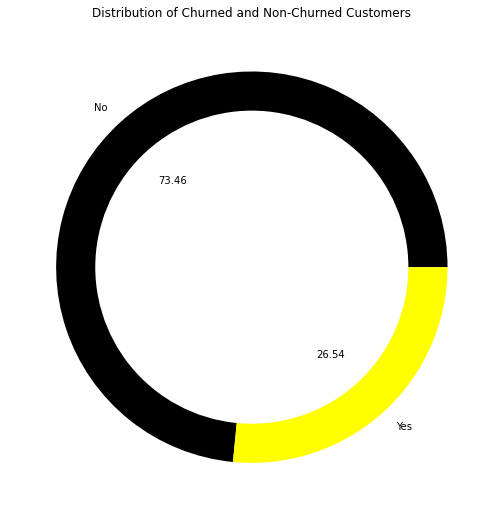

In [14]:
plt.figure(figsize=(18,9))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%0.2f',colors=['black','yellow'])
plt.title('Distribution of Churned and Non-Churned Customers')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show

#### From this we can say that non churned is more than churn rate

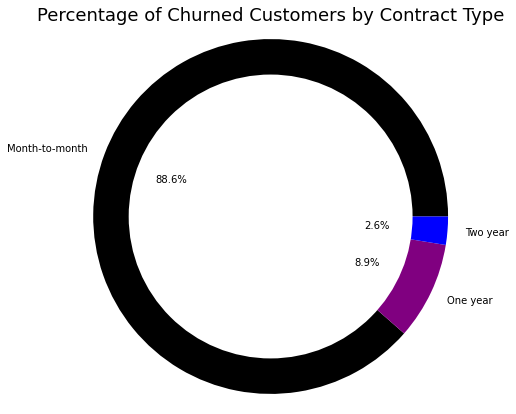

In [15]:
colors = ['k', 'purple', 'b']

churned = df[df['Churn'] == 'Yes']
churned_by_contract = churned.groupby('Contract')['Churn'].count()

plt.figure(figsize=(7, 7))
plt.pie(churned_by_contract, labels=churned_by_contract.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage of Churned Customers by Contract Type', fontsize=18)
plt.axis('equal')
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show
plt.show()

#### From this we can say that the churn rate is more when the contarct type is Month-to-Month, so within a year people are leaving this telco service because of some issues

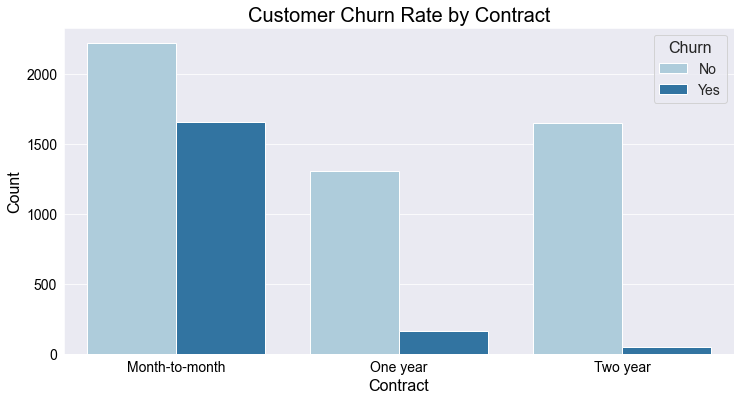

In [16]:
sns.set_palette('Paired')

sns.set_style('darkgrid')

plt.figure(figsize=(12,6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Customer Churn Rate by Contract', fontsize=20, color='k')
plt.xlabel('Contract', fontsize=16, color='k')
plt.ylabel('Count', fontsize=16, color='k')
plt.xticks(fontsize=14, color='k')
plt.yticks(fontsize=14, color='k')
plt.legend(fontsize=14, title='Churn', title_fontsize=16)
plt.show()

#### From this we can say that churn rate is high in month-to-month and the people who have taken the contract above 2 years are more compared to the rate of people who have left the telco service in the 2nd year

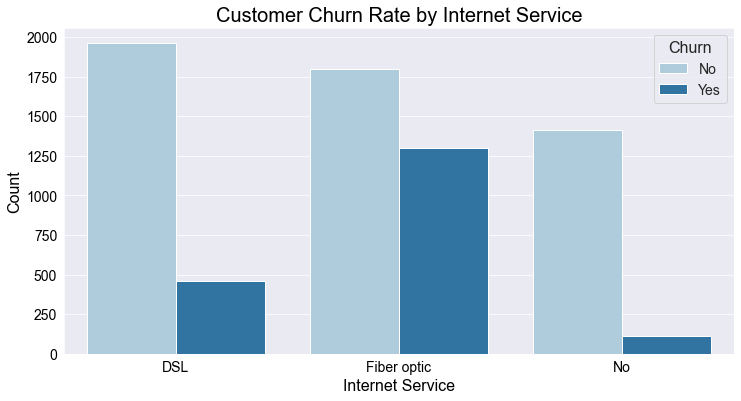

In [17]:
sns.set_palette('Paired')

sns.set_style('darkgrid')

plt.figure(figsize=(12,6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Customer Churn Rate by Internet Service', fontsize=20, color='k')
plt.xlabel('Internet Service', fontsize=16, color='k')
plt.ylabel('Count', fontsize=16, color='k')
plt.xticks(fontsize=14, color='k', rotation=0)
plt.yticks(fontsize=14, color='k')
plt.legend(fontsize=14, title='Churn', title_fontsize=16)
plt.show()

#### From this we can say that internet service may be good at some area but not everywhere, internet service in the fiber optic area is very poor so this may be the reason for the high rate of churn in the fiber optic area 

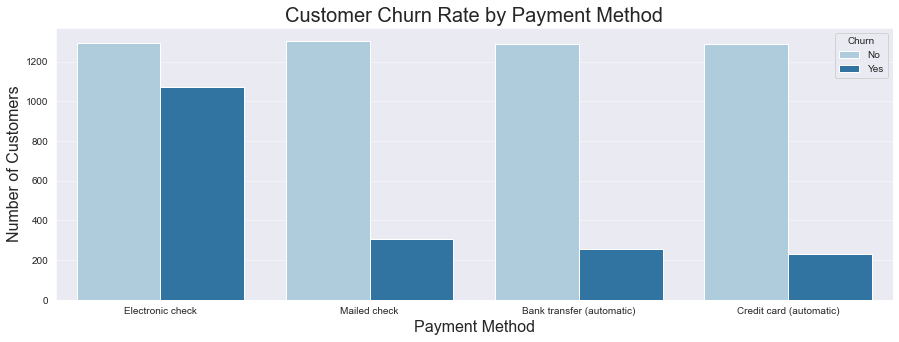

In [18]:
plt.figure(figsize=(15,5))
colors = sns.color_palette("Paired")
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette=colors)
plt.title('Customer Churn Rate by Payment Method', fontsize=20)
plt.xlabel('Payment Method', fontsize=16)
plt.ylabel('Number of Customers', fontsize=16)
plt.grid(axis='y', alpha=0.5)
plt.show()

#### From this we can say that some people may be facing some difficulty in the electronic check, so telco service have to look after that area to reduce the churn rate in electronic check

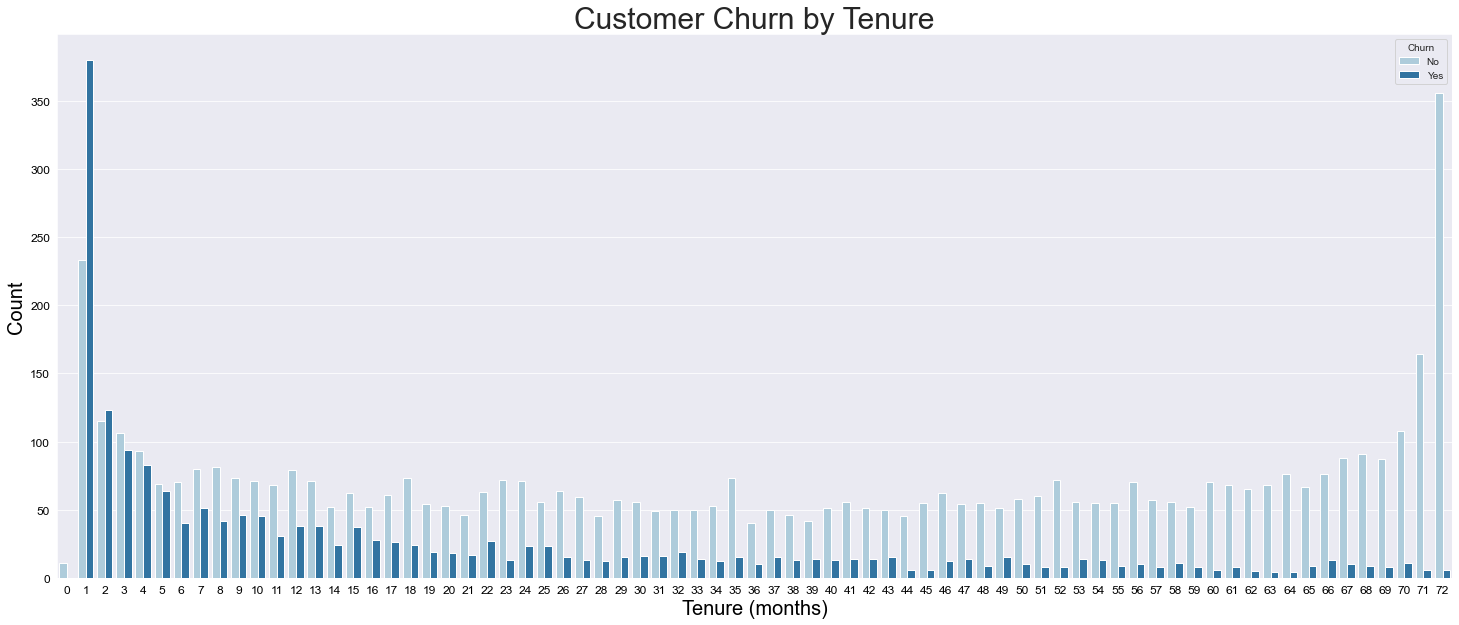

In [19]:
sns.set_palette("Paired")

plt.figure(figsize=(25,10))
sns.countplot(x="tenure",hue="Churn",data=df)
plt.title("Customer Churn by Tenure",size=30)
plt.xlabel("Tenure (months)", color='k',size=20)
plt.ylabel("Count", color='k',size=20)
plt.xticks(color='k',size=12)
plt.yticks(color='k',size=12)

plt.show()

#### As we can see here the churn rate is very high at the beginning itself, so company can reduce the customer churn rate by offering longer contract periods

In [20]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60], labels=['0-1 Year', '1-2 Years', '2-4 Years', '4-5 Years'])
df = df.drop(['customerID', 'tenure'], axis=1)

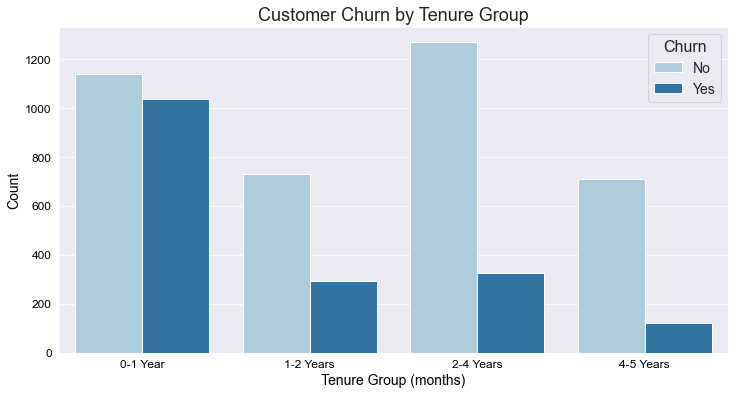

In [21]:
sns.set_palette("Paired")

plt.figure(figsize=(12,6))
sns.countplot(x="tenure_group",hue='Churn',data=df)
plt.xlabel("Tenure Group (months)", color='k',size=14)
plt.ylabel("Count", color='k',size=14)
plt.xticks(color='k',size=12)
plt.yticks(color='k',size=12)
plt.legend(title='Churn', labels=['No', 'Yes'], fontsize=14, title_fontsize=16)
plt.title("Customer Churn by Tenure Group",size=18)
plt.show()

#### As we can see here the churn rate is very high at the 0-1, so company can reduce the customer churn rate by offering longer contract periods

## Encoding Categorical Data

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])
df['tenure_group'] = le.fit_transform(df['tenure_group'])

### Splitting Data into Training and Testing Sets

In [24]:
from sklearn.model_selection import train_test_split
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model Building and Evaluation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [28]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
svc=SVC()

In [29]:
acc = []
pre = []
re = []
models = [lr,dt,rf,svc]
models_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC']

for i in models:
  i.fit(X_train,y_train)
  y_pred= i.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)
  recall= recall_score(y_test,y_pred)

  acc.append(accuracy)
  pre.append(precision)
  re.append(recall)

In [30]:
mods = pd.DataFrame()
mods['Models']=models_name
mods['Accuracy']= acc
mods['Precision']= pre
mods['Recall']= re

### Printing the Accuracy, precision and Recall scores of all the models

In [31]:
mods

,Models,Accuracy,Precision,Recall
0,LogisticRegression,0.817601,0.687097,0.571046
1,DecisionTreeClassifier,0.719659,0.471204,0.482574
2,RandomForestClassifier,0.785664,0.634981,0.447721
3,SVC,0.806246,0.682482,0.501340


##### After running the code, we obtain the Accuracy, precision and Recall scores of all the models. We can then choose the best model to make predictions on new data.
##### Some of the potential factors that could be contributing to customer churn in a telecom company include:
##### 1.Poor customer service or support
##### 2.High prices or billing issues
##### 3.Network quality or coverage issues
##### 4.Limited service or product offerings
##### 5.Contract or commitment terms
##### From the data visualization, we can see that the customers who have opted for a shorter contract period have a higher churn rate. Similarly, customers who have opted for fiber optic internet service and electronic check payment method also have a higher churn rate. On the other hand, customers who have opted for a longer contract period and automatic payment method have a lower churn rate
##### Based on the results of the machine learning models, the Logistic regression performs the best with an accuracy score of 81.7%
##### In conclusion, the telecom company can reduce the customer churn rate by offering longer contract periods, improving the quality of the fiber optic internet service, and providing more convenient payment methods in electronic check. The Logistic regression model can be used to predict which customers are likely to churn and offer them incentives or discounts to retain them

In [32]:
# !pip install autoviz
# from autoviz.AutoViz_Class import AutoViz_Class

In [33]:
# AV = AutoViz_Class()
# df = AV.AutoViz('WA_Fn-UseC_-Telco-Customer-Churn.csv')